In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('complexity_analysis_results.csv')
data = data.drop(['Relative entropy of word structure', 'cwi std', 'cwi min', 'cwi max'], axis=1)

In [3]:
data.tail()

,Kindergarten,Child name,Age,File name,cwi complexity,Word entropy,TTR,MTTR,cwi probs
2111,Suppes,none,3.210502,030216,0.100557,7.11085,0.140523,0.452919,"[0.046840426, 8.4777e-05, 0.00013289486, 6.616..."
2112,Suppes,none,3.232420,030224,0.102904,7.41894,0.165732,0.511642,"[0.5914964, 0.00046237194, 0.00010664657, 0.01..."
2113,Suppes,none,3.252740,030301,0.121427,7.67648,0.198490,0.586881,"[8.8576926e-05, 0.0001804685, 0.0011019637, 5...."
2114,Suppes,none,3.271918,030308,0.122200,7.83515,0.171642,0.558067,"[6.83153e-05, 0.91381603, 0.00038388727, 0.057..."
2115,Suppes,none,3.307534,030321,0.140288,7.96209,0.221057,0.550665,"[0.6007744, 0.0033328813, 0.00023330461, 5.829..."


In [4]:
data.describe()

,Age,cwi complexity,Word entropy,TTR,MTTR
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,2.295842,0.177894,5.374692,0.564900,0.661936
std,0.817875,0.125264,1.897019,0.276866,0.190032
min,0.771918,0.000149,0.591670,0.076471,0.082578
25%,1.709132,0.098281,4.027432,0.296076,0.517064
50%,2.161416,0.133749,5.595585,0.573718,0.629785
75%,2.741324,0.217562,7.107463,0.800000,0.800380
max,7.038356,0.888445,8.257650,1.000000,1.000000


In [5]:
corrs = data.corr()

<AxesSubplot:>

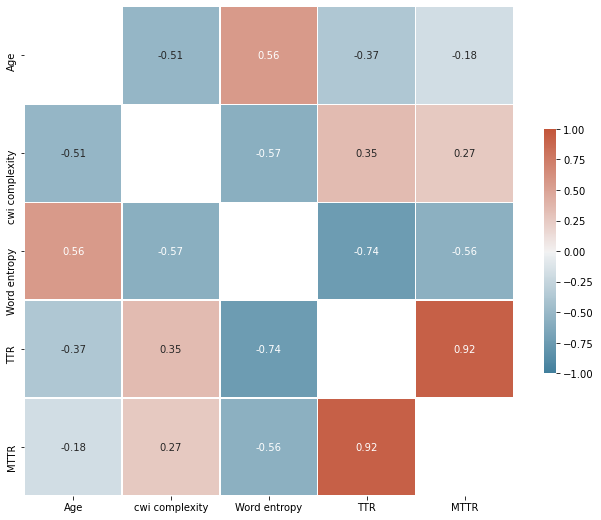

In [6]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corrs, dtype=bool)
for i in range(corrs.shape[0]):
    mask[i,i] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrs, mask=mask, cmap= cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

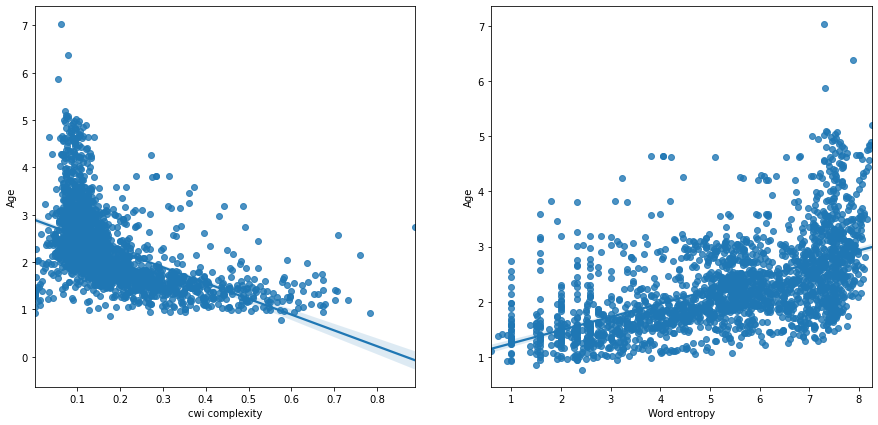

In [47]:
figure, axes = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,7)
sns.regplot(x="cwi complexity", y="Age", data=data, ax=axes[0])
sns.regplot(x="Word entropy", y="Age", data=data, ax=axes[1])
plt.show()

## Best correlation results for "Age" is 'Word entropy' and 'cwi complexity'

## Now lets test correlation for kindergartens

In [19]:
# One hot encoding
y = pd.get_dummies(data.Kindergarten)

data_kg = pd.concat([data, y], ignore_index=False, axis=1)
data_kg.head()

,Kindergarten,Child name,Age,File name,cwi complexity,Word entropy,TTR,MTTR,cwi probs,Braunwald,Brown,ComptonPater,Goad,Inkelas,Providence,Sachs,Suppes
0,Braunwald,none,1.444064,010510,0.239644,6.18887,0.500000,0.599923,"[0.0006874494, 0.00017787484, 0.45702955, 0.36...",1,0,0,0,0,0,0,0
1,Braunwald,none,1.446804,010511,0.236723,6.34967,0.470874,0.598974,"[0.0033150858, 0.001609847, 0.0017160272, 0.00...",1,0,0,0,0,0,0,0
2,Braunwald,none,1.449543,010512,0.176164,2.85595,0.555556,0.555556,"[0.7543637, 0.030214744, 0.023747755, 0.770141...",1,0,0,0,0,0,0,0
3,Braunwald,none,1.452283,010513,0.225916,6.20641,0.443478,0.577122,"[0.67479384, 0.019965004, 0.61848736, 0.025560...",1,0,0,0,0,0,0,0
4,Braunwald,none,1.455023,010514,0.352971,4.55908,0.560000,0.560000,"[0.5362259, 0.00035720147, 0.009544539, 0.1569...",1,0,0,0,0,0,0,0


In [20]:
corrs2 = data_kg.corr()

In [36]:
corrs3 = corrs2.iloc[5:,:].iloc[:,:5].T
corrs3

,Braunwald,Brown,ComptonPater,Goad,Inkelas,Providence,Sachs,Suppes
Age,0.146553,0.466028,-0.300887,0.030364,-0.159256,-0.020956,0.025421,0.063270
cwi complexity,-0.131667,-0.173789,0.178840,-0.001848,0.207489,-0.087332,-0.081979,-0.053822
Word entropy,0.104877,0.351350,-0.413610,0.066704,-0.359198,0.310396,0.083989,0.179466
TTR,-0.095616,-0.364702,0.661165,-0.083980,0.282841,-0.493188,-0.187812,-0.221185
MTTR,-0.134510,-0.218718,0.587549,-0.085807,0.249274,-0.460966,-0.243127,-0.135936


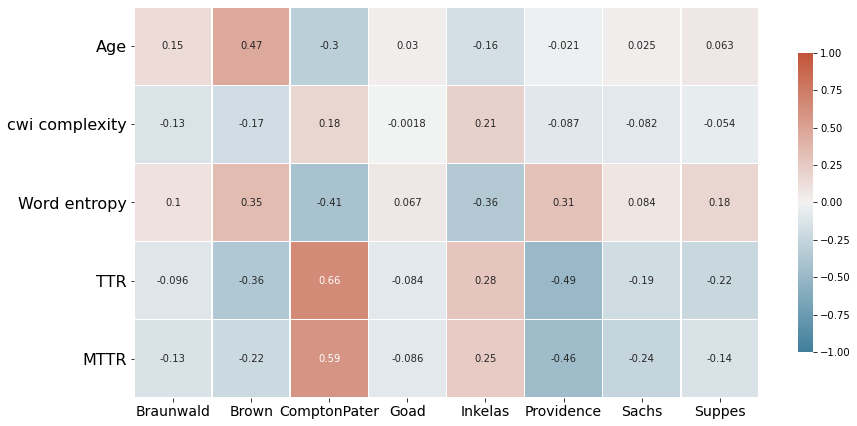

In [44]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corrs3, dtype=bool)
for i in range(corrs3.shape[0]):
#     mask[i,i] = True
    pass

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrs3, mask=mask, cmap= cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.yticks(rotation=0, fontsize = 16)
plt.xticks(fontsize=14)
plt.show()

## Kindergartens:

### Age.  
> Has sensible correlation with Brown. There are children older than in other places. This means children should use more complex speech. But this can only be seen by 'Word entropy'

<AxesSubplot:xlabel='Kindergarten', ylabel='Age'>

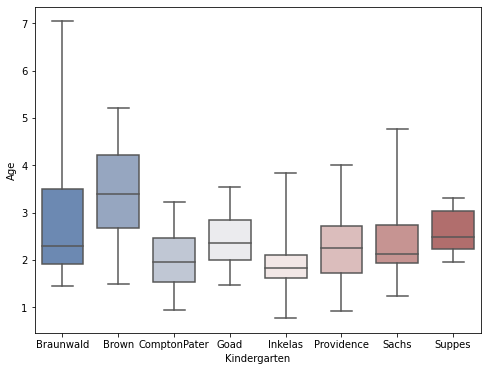

In [53]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Kindergarten", y="Age", data=data_kg, whis=[0, 100], width=0.75, palette="vlag")

### TTR
> 'ComptonPater' and 'Inkelas' gives a strong correlation with TTR, which means that what is taught there strongly influences this test  
> In other side 'Providence' and 'Suppes' have negattive correlation

<AxesSubplot:xlabel='Kindergarten', ylabel='TTR'>

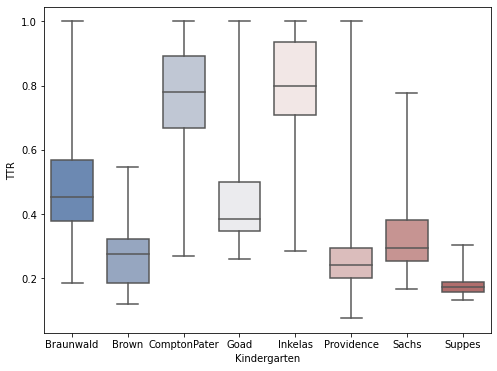

In [127]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Kindergarten", y="TTR", data=data_kg, whis=[0, 100], width=0.75, palette="vlag")

In [85]:
sns.set(rc={"font.size":14})

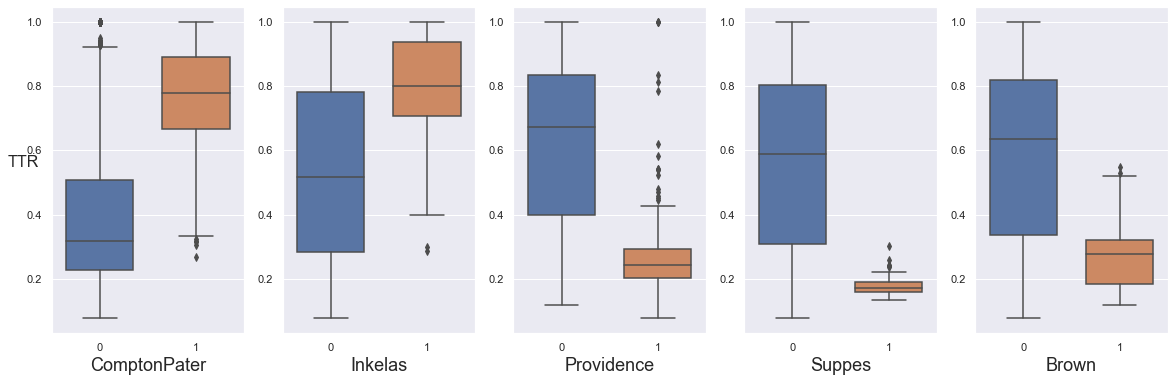

In [242]:
figure, axes = plt.subplots(nrows=1, ncols=5, sharey=False)
figure.set_size_inches(20,6)
sns.boxplot(x="ComptonPater", y="TTR", data=data_kg, width=0.7, ax=axes[0])
sns.boxplot(x="Inkelas", y="TTR", data=data_kg, width=0.7, ax=axes[1])
sns.boxplot(x="Providence", y="TTR", data=data_kg, width=0.7, ax=axes[2])
sns.boxplot(x="Suppes", y="TTR", data=data_kg, width=0.7, ax=axes[3])
sns.boxplot(x="Brown", y="TTR", data=data_kg, width=0.7, ax=axes[4])

for a in range(0, len(axes)):
    axes[a].set_ylabel(None)
    axes[a].set_xlabel(axes[a].get_xlabel(), fontsize=18)
    
axes[0].set_ylabel('TTR', fontsize=16, rotation=0)

plt.show()

In [239]:
axes[0].get_xlabel()

'ComptonPater'

### We see the dependence of the complexity of speech on the place where the child is studying

# 2. Prediction test _Age_<>_CWI_

In [160]:
from sklearn.linear_model import LinearRegression, Ridge
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, f1_score
import random

In [152]:
lr_model = LinearRegression()
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0)

In [133]:
cols = data_kg.columns.values
cols

array(['Kindergarten', 'Child name', 'Age', 'File name', 'cwi complexity',
       'Word entropy', 'TTR', 'MTTR', 'cwi probs', 'Braunwald', 'Brown',
       'ComptonPater', 'Goad', 'Inkelas', 'Providence', 'Sachs', 'Suppes'],
      dtype=object)

In [134]:
cols[4:8]

array(['cwi complexity', 'Word entropy', 'TTR', 'MTTR'], dtype=object)

In [231]:
X_train, X_test, y_train, y_test = train_test_split(data_kg.loc[:,'cwi complexity'].values, data_kg['Age'].values,  
                                                  test_size=0.1, 
                                                  random_state=42)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

print('Training LR')
lr_model.fit(X_train, y_train)
print('Training XGB')
_ = xgb_model.fit(X_train, y_train)

Training LR
Training XGB


## R square test (1-best, 0-bad)

In [232]:
lr_model.score(X_test, y_test)

0.28478976640908304

In [233]:
xgb_model.score(X_test, y_test)

0.2843090999741714

## MAE (0-better)

In [265]:
np.mean(abs(y_test.reshape(-1) - lr_model.predict(X_test)))

0.7257546387962405

In [269]:
np.mean(abs(y_test.reshape(-1) - xgb_model.predict(X_test)))

0.48855256724133705

<AxesSubplot:ylabel='Count'>

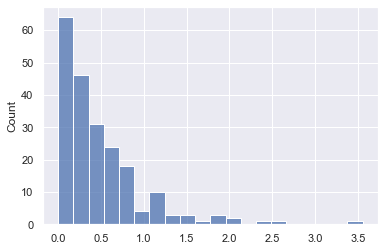

In [267]:
sns.histplot(abs((y_test.reshape(-1) - xgb_model.predict(X_test)).reshape(-1)), bins=20)

### Expectation of R square test

In [279]:
def rand_r(dataset, x_cols, epochs):
    r_lr = []
    r_xgb = []
    lr_er = np.zeros((epochs, round(dataset.shape[0]*0.1)))
    xgb_er = np.zeros((epochs, round(dataset.shape[0]*0.1)))
    for e in range(epochs):
        lr_model = LinearRegression()
        xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')
        rand_state = random.randint(1, 10000)
        X_train, X_test, y_train, y_test = train_test_split(dataset.loc[:,x_cols], dataset['Age'],  
                                                  test_size=0.1, 
                                                  random_state=rand_state)

        lr_model.fit(X_train, y_train)
        _ = xgb_model.fit(X_train, y_train)
        r_lr.append(round(lr_model.score(X_test, y_test), 4))
        r_xgb.append(round(xgb_model.score(X_test, y_test), 4))
        lr_er[e,:] = abs(y_test.values.reshape(-1) - lr_model.predict(X_test))
        xgb_er[e,:] = abs(y_test.values.reshape(-1) - xgb_model.predict(X_test))
        
        print(f'\repoch {e+1} score: lr={r_lr[-1]:.2f}, xgb={r_xgb[-1]:.2f}; {rand_state=}', end='')
    return r_lr, r_xgb, lr_er, xgb_er

### Using ['cwi complexity', 'Word entropy', 'TTR', 'MTTR'] columns to predict "Age"

In [280]:
r_lr, r_xgb, lr_er, xgb_er = rand_r(data_kg, cols[4:8], 100)

epoch 100 score: lr=0.40, xgb=0.49; rand_state=263

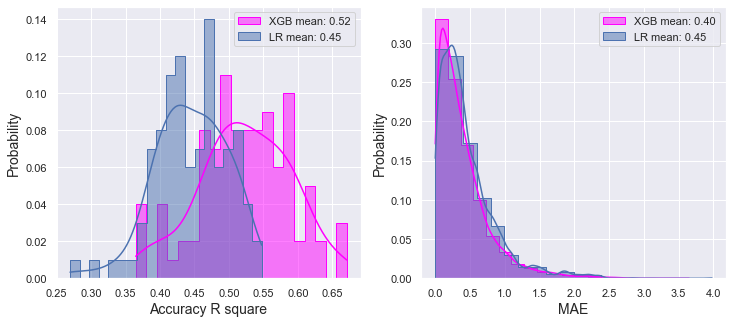

In [329]:
figure, axes = plt.subplots(nrows=1, ncols=2, sharey=False)
figure.set_size_inches(12,5)
sns.histplot(r_xgb, bins=20, color='magenta', alpha=0.5, label=f'XGB mean: {np.mean(r_xgb):.2f}', kde=True, stat="probability", element="step", ax=axes[0])
sns.histplot(r_lr, bins=20, alpha=0.5, label=f'LR mean: {np.mean(r_lr):.2f}', kde=True, stat="probability", element="step", ax=axes[0])
axes[0].set_xlabel('Accuracy R square', fontsize=14)
axes[0].set_ylabel('Probability', fontsize=14)
axes[0].legend()
sns.histplot(xgb_er.ravel(), bins=20, color='magenta', alpha=0.5, label=f'XGB mean: {np.mean(xgb_er):.2f}', kde=True, stat="probability", element="step", ax=axes[1])
sns.histplot(lr_er.ravel(), bins=20, alpha=0.5, label=f'LR mean: {np.mean(lr_er):.2f}', kde=True, stat="probability", element="step", ax=axes[1])
axes[1].set_xlabel('MAE', fontsize=14)
axes[1].set_ylabel('Probability', fontsize=14)
plt.legend()
plt.show()

### ['cwi complexity', 'Word entropy', 'TTR', 'MTTR'] + Kindergarten

In [326]:
r_lr2, r_xgb2, lr_er2, xgb_er2 = rand_r(data_kg, np.append(cols[4:8],cols[9:]), 100)

epoch 100 score: lr=0.54, xgb=0.67; rand_state=8454

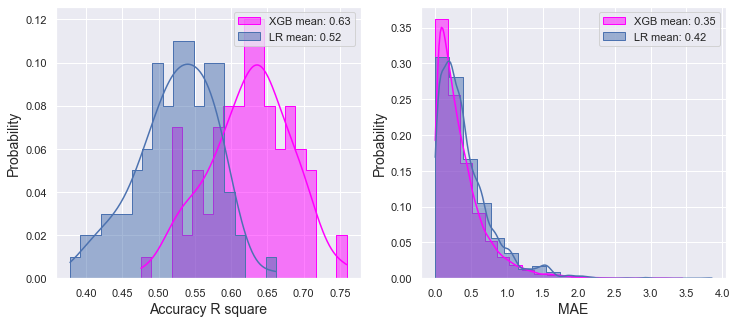

In [328]:
figure, axes = plt.subplots(nrows=1, ncols=2, sharey=False)
figure.set_size_inches(12,5)
sns.histplot(r_xgb2, bins=20, color='magenta', alpha=0.5, label=f'XGB mean: {np.mean(r_xgb2):.2f}', kde=True, stat="probability", element="step", ax=axes[0])
sns.histplot(r_lr2, bins=20, alpha=0.5, label=f'LR mean: {np.mean(r_lr2):.2f}', kde=True, stat="probability", element="step", ax=axes[0])
axes[0].set_xlabel('Accuracy R square', fontsize=14)
axes[0].set_ylabel('Probability', fontsize=14)
axes[0].legend()
sns.histplot(xgb_er2.ravel(), bins=20, color='magenta', alpha=0.5, label=f'XGB mean: {np.mean(xgb_er2):.2f}', kde=True, stat="probability", element="step", ax=axes[1])
sns.histplot(lr_er2.ravel(), bins=20, alpha=0.5, label=f'LR mean: {np.mean(lr_er2):.2f}', kde=True, stat="probability", element="step", ax=axes[1])
axes[1].set_xlabel('MAE', fontsize=14)
axes[1].set_ylabel('Probability', fontsize=14)
plt.legend()
plt.show()